<a href="https://colab.research.google.com/github/bothdev/Machine-Learning-With-FPB/blob/main/Vorreakboth_of_FPB_ML_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
<h1><b>Homework 1: Simulation methods</b></h1>
<h3><b>Introduction to Python for ML</b></h3>
</div>

[**Forum for Pushing the Boundary**](https://www.facebook.com/fpbcambodia) <br>

Deadline: 11:59PM, 14/01/2024

<br>

---

**សម្គាល់៖ ពេលធ្វើកិច្ចការនេះ សូមបន្ថែមឈ្មោះអ្នកនៅខាងចុងនៃឈ្មោះរបស់ Notebook នេះ។**

- បើអ្នកធ្វើកិច្ចការនេះក្នុង **Google colab**, កិច្ចការអាចដាក់មកកាន់ពួកយើងវិញដោយគ្រាន់តែ share link នៃកិច្ចការរបស់អ្នក។

- បើអ្នកធ្វើការក្នុងម៉ាសុីនផ្ទាល់ខ្លួន សូមផ្ញើកិច្ចការជា jupyter notebook មកកាន់យើងក្នុង ផ្នែក **Classwork** ក្នុង [Google Classroom](https://classroom.google.com/c/NjM4ODM3MTc3MzY4?cjc=ww6qhbx) របស់យើង ។

-----------

<br>

ក្នុងការសិក្សា Machine learning ទិន្នន័យត្រូវបានគេប្រដូចនឹងវត្ថុគណិតវិទ្យាដែលហៅថា **"អថេចៃដន្យ (Random variable)"**។ យើងអាចបង្កើតឬ simulate អថេរចៃដន្យឬ តម្លៃចៃដន្យផ្សេងៗក្នុង Python បានដោយងាយដោយប្រើប្រាស់កញ្ចប់កម្មវិធីដូចជា **numpy** ជាដើម។ ក្នុងកិច្ចការផ្ទះនេះយើងនឹងសិក្សាពីវិធីខ្លះៗនៃការបង្កើត pseudo-random variable ដោយប្រើវិធីសាស្រ្តមួយចំនួន។

<br>

### **១. Linear Congruential Generators (LCG)**

ក្នុង LCG គេបង្កើតអថេរចៃដន្យឯកសណ្ឋាន (uniform random variable) ក្នុងចន្លោះ $[0,1]$ ដោយប្រើប្រាស់ស្វ៊ីតម៉ូឌូឡូមានរាង៖

$$\begin{cases}\text{seed: } x_0\in\{1,…,m-1\}\\
x_{n+1}≡(ax_n+b) \mod m
\end{cases}$$
ចំពោះចំនួនគត់ $a,b$ និង $m$ ដែលចំនួនចៃដន្យកំណត់ដោយ៖ $u_i=\frac{x_i}{m}$ ។

នៅឆ្នាំ 1988, Stephen K. Park និង Keith W. Miller លើកឡើងនូវតម្លៃ $$a = 7^5=16807, b = 0, m = 2^{31}-1=2\ 147\ 483\ 647$$ ដែលគេហៅវិធីសាស្រ្តបង្កើតចំនួនចៃដន្យនេះថា [Park-Miller Psedo-random number generator](https://www.firstpr.com.au/dsp/rand31/) ។ តាមពិតទៅនេះមិនមែនជាចំនួនចៃដន្យទេ តែចំពោះ $x_0$ ផ្សេងៗគ្នាតួររបស់ស្វ៊ីតនេះមានសភាពរាយប៉ាយល្អនិង អាចប្រើប្រាស់ក្នុងកិច្ចការមួយចំនួនបានដូចជាការប៉ានស្មានតម្លៃប្រូបាបប៊ីលីតេឬ simulation ផ្សេងៗ (លើកលែងក្នុង cryptography) ។

យើងប្រើ `datetime` នៃ `datetime` package ដើម្បីហៅពេលវេលានៃម៉ាសុីនកុំព្យូទ័រយើងក្នុងពេលកំពុងប្រើប្រាស់ដូចក្នុងឧទាហរណ៍ខាងក្រោម។

In [ ]:
from datetime import datetime

# ដើម្បីទាញយកកាលបរិច្ឆេតភ្លាមៗក្នុងម៉ាសុីនកុំព្យូទ័រ
current_time = datetime.now()

# កាត់យកតែត្រឹម microsecond នៃកាលបរិច្ឆេតខាងលើ
microsec = current_time.microsecond

print(f'* កាលបរិច្ឆេតពេលនេះគឺ {current_time}')
print(f'* មីក្រូវិនាទីនេះគឺ {microsec}')

* កាលបរិច្ឆេតពេលនេះគឺ 2023-12-20 21:13:50.918378
* មីក្រូវិនាទីនេះគឺ 918378



--------------

**ក.** សរសេរ function `LCG(m)` ដែលបង្កើត list ប្រវែង $m$ នៃចំនួន (ចៃដន្យ) នៅចន្លោះ $[0,1]$ ដោយប្រើប្រាស់ដោយប្រើប្រាស់វិធីសាស្រ្ត LCG
ខាងលើដោយកំណត់យក seed $x_0$ ជា **microsecond** នៃពេលដែលអនុគមន៍របស់អ្នកត្រូវបានហៅមកប្រើ។

In [ ]:
def LCG(n):
  # សរសេរកូដនៅទីនេះ
  pass   # លុបចោលពេលចាប់ផ្តើមសរសេរកូដ

--------------------

**ខ.** ដោយប្រើអនុគមន៍ `LCG` ខាងលើ ចូរបង្កើត list នៃអថេរចៃដន្យ Uniform ពីរតាងដោយ $A$ និង $B$ ដែលមានប្រវែង $m=100$ ។

In [ ]:
A = LCG(100)
B = LCG(100)


-------------------

គ. យើងនឹងប្រើអនុគមន៍ខាងក្រោមនេះដើម្បីមើលរបាយនៃចំនួនដែលបានបង្កើតក្នុងប្លង់វិមាត្រ២។ តើមើលទៅវាដូចជាចំនួនចៃដន្យឬអត់?

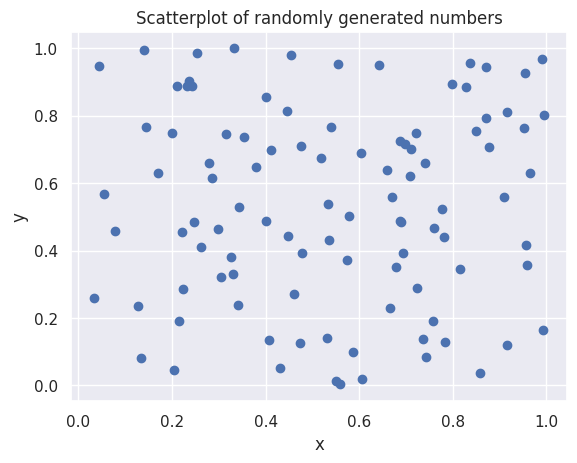

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def scatterplot(A,B):
  plt.scatter(A, B)
  plt.title("Scatterplot of randomly generated numbers")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

# ដៅចំណុចដែលបានបង្កើត
scatterplot(A, B)

---------------

ឃ. សង់ក្រាហ្វីកខាងលើចំពោះតម្លៃ $m=500, 1000, 5000, 10000$ ។

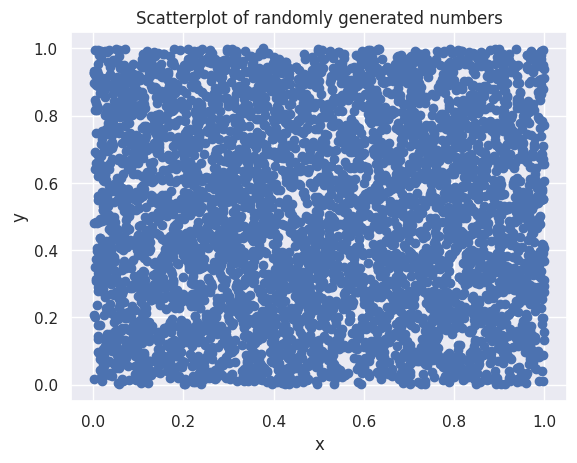

In [ ]:
A, B = LCG(5000), LCG(5000)
scatterplot(A, B)

--------------

ង. ដើម្បីពិនិត្យមើលដង់សុីតេនៃរបាយអថេរចៃដន្យជាប់ឬ យកតម្លៃខុសៗគ្នាច្រើន យើងប្រើអនុគមន៍ខាងក្រោម។ សាកពិនិត្យមើលដង់សុីតេរបស់វាចំពោះតម្លៃផ្សេងៗគ្នានៃ $m$ ។

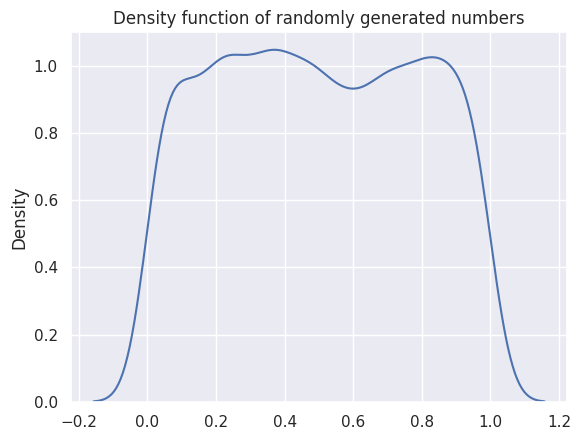

In [ ]:
def densityplot(A, B = None):
  sns.kdeplot(A)
  if B is not None:
    sns.kdeplot(B)
  plt.title("Density function of randomly generated numbers")
  plt.show()

# ប្រើអនុគមន៍លើ A
densityplot(A)

# ប្រើអនុគមន៍លើ A និង B
densityplot(A, B)

- ចំពោះរបាយអថេរចៃដន្យដាច់មានតម្លៃតូចគួរសមយើងគួរប្រើ barplot ដូចខាងក្រោមដើម្បីពិនិត្យមើលរបាយរបស់វា៖

In [ ]:
def barplot(A):
  S = set(A)
  temp = [sum([A[i] == j for i in range(len(A))]) for j in S]
  temp = [temp[i]/sum(temp) for i in range(len(temp))]
  plt.bar([str(i) for i in S], temp)
  plt.title("Barplot of randomly generated numbers/categories")
  plt.show()

--------------

ង. ចេញពីអថេរចៃដន្យ uniform គេអាចបង្កើតអថេរចៃដន្យជាច្រើនផ្សេងទៀត។ ងាយជាងគេគឺ អថេរចៃដន្យ Bernoulli ដែលកំណត់ដោយ៖

$$X\sim\mathcal{B}(p)⇔X=\begin{cases}1,&\mbox{with probability }p\\ 0,&\mbox{with probability }1-p\end{cases}$$

ចូរបង្កើតអនុគមន៍ `Bernoulli(m,p)` ដែលបង្កើត list ប្រវែង $m$ នៃអថេរចៃដន្យ Bernoulli ដោយប្រើប្រាស់អថេរចៃដន្យ uniform ដែលបានបង្កើតដោយអនុគមន៍ `LCG` ។ ចំពោះ $m=1000$ គណនា `LCG`$(m)$ រួចគណនាមធ្យមនិង សង់ក្រាបនៃរបាយរបស់វា។

In [ ]:
def Bernoulli(m, p):
  # To do
  pass

---------------

ច. សរសេរអនុគមន៍ `Geometric(m,p)` និង `Binomial(m,n,p)` ដែលផ្តល់ជាលទ្ធផលនូវ list ប្រវែង $m$ នៃអថេរចៃដន្យ Geometric ប៉ារ៉ាម៉ែត្រ $p$ និង អថេរចៃដន្យ Binomial ដែលមានប៉ារ៉ាមែត្រ $n$ និង $p$ រាងគ្នា។ សាងល្បងបង្កើតតម្លៃនៃអថេរចៃដន្យនីមួយៗដោយប្រើប៉ារ៉ាម៉ែត្រដែលអ្នកជ្រើសរើសនិង សង់ក្រាបនៃរបាយរបស់វា។

In [ ]:
# Geometric
def Geometric(m, p):
  # To do
  pass

In [ ]:
# To do

In [ ]:
# Binomial
def Binomial(m, n, p):
  # To do
  pass

In [ ]:
# To do


---------------

ឆ. របាយ `Multinomial` ឬ `Categorical` ជារបាយប្រូបាបប៊ីលិតេដែលគេនិយមប្រើប្រាស់ក្នុងការសិក្សាទិន្នន័យ។ ចំពោះ $\vec{x}=(x_1,...,x_K)$ ដែល $x_1<x_2<...<x_K$ និង $\vec{p}=(p_1,...,p_K)$ ផ្ទៀងផ្ទាត់ $\sum_{k=1}^Kp_k=1$ គេថា $X\sim\mathcal{Multinom}(\vec{x},\vec{p})$ កាលណា៖ $\mathbb{P}(X=x_k)=p_k$ ចំពោះ $k=1,...,K$ ។

<br>

ឆ.១. យើងតាង $$k^*=\min_k\left\{U\leq \sum_{j=1}^kp_j\right\}$$
ស្រាយថាអថេរ $X_{k^*}\sim\mathcal{Multinom}(\vec{x},\vec{p})$ ។

**ចម្លើយ** ...


---------------

ឆ.២. សរសេរអនុគមន៍ `Multinom(m,x,p)` ដើម្បីបង្កើត list ប្រវែង $m$ នៃអថេរ `Multinomial` ដែលមានប៉ារ៉ាម៉ែត្រជា list ប្រវែងដូចគ្នា $x$ និង $p$ ។

In [ ]:
def Multinom(m, x, p):
  # To do
  pass


----------

ឆ.៣. យើងចង់បង្កើតល្បែងឡុកឡាក់ដែលយកតម្លៃក្នុង $x=(1,2,3,4,5,6)$ ជាមួយប្រូបាប $p=(p_1,...,p_6)$ តាមតែអ្នកជ្រើសរើស ។ សាកបោះគ្រាប់ឡុកឡាក់នេះ $1000$ ដងនិង គណនាប្រូបាបនៃការចេញមុខនីមួយៗ។ តើវាប្រហាក់ប្រហែលនឹង $p$ ឬអត់? ប្រៀបធៀបរបាយរបស់វាទាំងពីរ។

In [ ]:
# Example
p = [0.3, 0.1, 0.2, 0.1, 0.25, 0.05]
x = list(range(1, 7))
m = 1000

# គណនាដោយប្រើអនុគមន៍របស់អ្នក
Multinom(m, x, p)


----------------

ឆ.៤. គេមានគេហទំព័រចំនួន ៥ តាងដោយ៖ $x=(1,2,3,4,5)$ ។ យើងចង់ដាក់ផ្ទាំងផ្សាយពាណិជកម្មនៅលើគេហទំព័រ ១ ក្នុងចំណោមគេហទំព័រទាំងនេះដើម្បីឲ្យមានអ្នកទស្សនាច្រើនជាងបំផុត។ អ្វីដែលយើងមានគឺ ម៉ាទ្រីស transition ខាងក្រោមដែលបានពីស្ថិតិមនុស្សដែល click លើគេហទំព័រទាំង៥ ៖

$$P=\left(\begin{array}
\ 1/6 & 1/5 & 1/3 & 2/15 & 1/6\\
1/10 & 3/10 & 2/10 & 3/10 & 1/10\\
2/15 & 4/15 & 1/5 & 2/15 & 4/15\\
1/25 & 2/5 & 1/5 & 6/25 & 3/25\\
2/7 & 2/7 & 0 & 2/7 & 1/7\\
\end{array}\right)$$

---

**ជួរដេកទី $i$ នៃ $P$ ជាប្រូបាបបីលីតេដែលមនុស្សកំពុងស្ថិតនៅគេហទំព័រទី $i$ អាចនឹង click ទៅគេហទំព័រផ្សេងៗទៀត។ ឧទារហណ៍៖ $P_{1,4} = 2/15$ មានន័យថាបើមនុស្សម្នាក់ស្ថិតនៅគេហទំព័រទី $1$ នោះគាត់មានប្រូបាបបីលីតេ $2/15$ ក្នុងការ click ចូលទៅគេហទំព័រទី $3$ ។**

---

<br>

**សំនួរ៖**

- បើមនុស្សម្នាក់មានប្រូបាបបីលីតេដូចៗគ្នាក្នុងការចូលទៅកាន់គេហទំព័រទាំង៥នេះ ចូរសរសេរអនុគមន៍ `link_click(n,P)` ដែល simulate ការ click $n$ ដងរបស់គាត់ដោយផ្តល់លទ្ធផលជា list មានប្រវែង $n$ មានផ្ទុកលេខរាងនៃគេហទំព័រដែលគាត់បានឆ្លងកាត់ក្នុង $n$ clicks ។ សាកល្បងចំពោះ $n=1000$ ។ តើមានមនុស្ស click លើគេហទំព័រណាច្រើនជាងគេ?

- ធ្វើសំនួរខាងលើឡើងវិញចំនួន $m=100$ ដង រួចសម្រេចចិត្តថាតើគេហរទំព័រណាដែលអ្នកនឹងដាក់ផ្សាយពាណិជ្ជកម្ម។

In [ ]:
def link_click(n, P):
  # To do
  pass

In [ ]:
n = 1000
P = [[1/6, 1/5, 1/3, 2/15, 1/6],
     [1/10, 3/10, 2/10, 3/10, 1/10],
     [2/15, 4/15, 1/5, 2/15, 4/15],
     [1/25, 2/5, 1/5, 6/25, 3/25],
     [2/7, 2/7, 0, 2/7, 1/7]]
clicks = link_click(n, P)

# គណនាប្រូបាបនៃគេហទំព័រនីមួយៗ
# To do

In [ ]:
# ក្នុងការគណនា 1000 ដង
m = 100


-------------

### **២. Inverse method**

ចំពោះអថេរចៃដន្យ $X$ ជាប់ដែលមានអនុគមន៍របាយប្រូបាប $F(x)=\mathbb{P}(X\leq x)$ ។ តាង $U\sim \mathcal{U}[0,1]$ ជាអថេរចៃដន្យ uniform លើចន្លោះ $[0,1]$ ។

ក. បើ $F^{-1}$ ជាចម្រាស់នៃ $F$ បង្ហាញថា $F^{-1}(U)$ មានរបាយដូចគ្នានឹង $X$ ។

**ចម្លើយ** ...


---------------

ខ. បង្កើតអនុគមន៍ `Expo`$(m,\lambda)$ ដែលបង្កើត list ប្រវែង $m$ នៃអថេរចៃដន្យ exponential ដែលមានប៉ារ៉ាម៉ែត្រ $\lambda$ ។ បង្កើត $1000$ តម្លៃនៃអថេរចៃដន្យនេះរួចគណនាមធ្យមនិង សង់របាយរបស់វា។ *អ្នកអាចប្រើប្រាស់អនុគមន៍គណិតវិទ្យាក្នុង package `math` ដូចខាងក្រោម៖*

```
import math
math.log(math.exp(1))  # សម្រាប់គណនា log() ឬ exp()
```

In [ ]:
def Expo(m, rate):
  # To do
  pass

In [ ]:
# To do

------------------

គ.១. បើគេមានអថេរចៃដន្យ Exponential $X_1,X_2,...,\sim\mathcal{E}(\lambda)$ មិនអាស្រ័យគ្នាឬ ឯករាជពីគ្នាពីរៗ។ យើងតាង $S_k=\sum_{j=1}^kX_j$ ហើយនិង $$T=
\begin{cases}0,&\text{if }U\leq e^{-\lambda}\\
\max\left\{k\geq 1:S_k\leq 1\right\}, &\text{otherwise}
\end{cases}
$$

ស្រាយថាប្រូបាបប៊ីលីតេដង់សុីតេនៃ $T$ កំណត់ដោយ៖

$$\mathbb{P}(T=m)=\frac{\lambda^m}{m!}e^{-\lambda},\forall m=0,1,...$$

ដែលនេះមានន័យថា $T$ ជាអថេរចៃដន្យ Poisson និងកំណត់សរសេរដោយ៖ $T\sim\mathcal{P}(\lambda)$ ។

<br>

**ចម្លើយ**

...


----------------


គ.២. បង្កើតអនុគមន៍ `Poisson`$(m,\lambda)$ ដែលបង្កើត list ប្រវែង $m$ នៃអថេរចៃដន្យ poisson ដែលមានប៉ារ៉ាម៉ែត្រ $\lambda$ ។ បង្កើត $1000$ តម្លៃនៃអថេរចៃដន្យនេះរួចគណនាមធ្យមនិង សង់របាយរបស់វា។

In [ ]:
def Poisson(m, rate):
  # To do
  pass